## Exercici 01

### Parteix el conjunt de dades en train i test

In [1]:
#Importamos módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Importamos datos. Los datos cargados provienen de la T02 del módulo 01, por lo que el data set está limpio.
df= pd.read_csv('M01-T02-DF_Pandas.csv', index_col=0) 
df.head()

,Month,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,Speed,Delayed,Route
index,,,,,,,,,,,,,
0,1,WN,116.0,-14.0,8.0,IAD,TPA,810,0,0,6.982759,0,IAD-TPA
1,1,WN,113.0,2.0,19.0,IAD,TPA,810,0,0,7.168142,0,IAD-TPA
2,1,WN,76.0,14.0,8.0,IND,BWI,515,0,0,6.776316,1,IND-BWI
3,1,WN,77.0,34.0,34.0,IND,BWI,515,0,0,6.688312,1,IND-BWI
4,1,WN,87.0,11.0,25.0,IND,JAX,688,0,0,7.908046,1,IND-JAX


In [3]:
# Realizamos un resumen descriptivo de las variables y vemos que "Speed" tiene algún valor infinito, esto es porque la columna speed se creo a partir 
# de Distance/AirTime y alguna linea contenía AirTime=0. 
df.describe()

,Month,AirTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted,Speed,Delayed
count,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1928369.0,1928369.0,1.928369e+06,1.928369e+06
mean,6.107859e+00,1.082772e+02,4.219988e+01,4.309169e+01,7.649487e+02,0.0,0.0,inf,8.114738e-01
std,3.480752e+00,6.864264e+01,5.678474e+01,5.326603e+01,5.738860e+02,0.0,0.0,NaN,3.911319e-01
min,1.000000e+00,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.0,0.0,3.548387e-01,0.000000e+00
25%,3.000000e+00,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,0.0,0.0,5.864407e+00,1.000000e+00
50%,6.000000e+00,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,0.0,0.0,6.730337e+00,1.000000e+00
75%,9.000000e+00,1.370000e+02,5.600000e+01,5.300000e+01,9.970000e+02,0.0,0.0,7.469136e+00,1.000000e+00
max,1.200000e+01,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,0.0,0.0,inf,1.000000e+00


In [4]:
#Los vuelos con AirTime=0 son los vuelos cancelados, por lo que reemplazaremos el valor de inf. por 0.
df=df.replace([np.inf, -np.inf], value=0, inplace=False)


In [5]:
#Dividimos los datos en train y test.
#Escogemos un división --> train:67%, Test:33%
train, test= train_test_split(df,test_size=0.33,random_state=300)
train=train.reset_index()
test=test.reset_index()

In [6]:
train.describe() #Evaluamos de manera descriptiva el conjunto train

,index,Month,AirTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted,Speed,Delayed
count,1.292007e+06,1.292007e+06,1.292007e+06,1.292007e+06,1.292007e+06,1.292007e+06,1292007.0,1292007.0,1.292007e+06,1.292007e+06
mean,9.681677e+05,6.110091e+00,1.082942e+02,4.217681e+01,4.306319e+01,7.650223e+02,0.0,0.0,6.615316e+00,8.115722e-01
std,5.590552e+05,3.482258e+00,6.866146e+01,5.677920e+01,5.326062e+01,5.738377e+02,0.0,0.0,1.506015e+00,3.910535e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,-6.900000e+01,6.000000e+00,1.100000e+01,0.0,0.0,0.000000e+00,0.000000e+00
25%,4.840675e+05,3.000000e+00,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,0.0,0.0,5.863636e+00,1.000000e+00
50%,9.676530e+05,6.000000e+00,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,0.0,0.0,6.730337e+00,1.000000e+00
75%,1.452764e+06,9.000000e+00,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,0.0,0.0,7.468354e+00,1.000000e+00
max,1.936755e+06,1.200000e+01,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,0.0,0.0,7.100000e+02,1.000000e+00


In [7]:
test.describe() #Evaluamos de manera descriptiva el conjunto test

,index,Month,AirTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted,Speed,Delayed
count,6.363620e+05,636362.000000,636362.000000,636362.000000,636362.000000,636362.000000,636362.0,636362.0,636362.000000,636362.000000
mean,9.673026e+05,6.103328,108.242560,42.246732,43.149549,764.799290,0.0,0.0,6.616944,0.811274
std,5.584890e+05,3.477693,68.604471,56.796026,53.276998,573.984549,0.0,0.0,1.843870,0.391291
min,1.000000e+00,1.000000,0.000000,-109.000000,6.000000,11.000000,0.0,0.0,0.000000,0.000000
25%,4.836610e+05,3.000000,58.000000,9.000000,12.000000,338.000000,0.0,0.0,5.866142,1.000000
50%,9.676535e+05,6.000000,90.000000,24.000000,24.000000,606.000000,0.0,0.0,6.730337,1.000000
75%,1.450117e+06,9.000000,137.000000,56.000000,53.000000,997.000000,0.0,0.0,7.471910,1.000000
max,1.936750e+06,12.000000,733.000000,1707.000000,1710.000000,4962.000000,0.0,0.0,932.000000,1.000000


## Exercici 2

### Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...)

In [8]:
from sklearn import preprocessing #Importamos módulo

#### 1) Crear columnes dummies

In [9]:
# Se han creado columnas dummies de 2 maneras diferentes. Primero con el módulo de pandas.
df2= pd.get_dummies(df,columns=['UniqueCarrier']).reset_index() #Para convertir la variable categórica UniqueCarrier a variables integrales creamos col.dummies
df2.head()

,index,Month,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,...,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,0,1,116.0,-14.0,8.0,IAD,TPA,810,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,113.0,2.0,19.0,IAD,TPA,810,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,1,76.0,14.0,8.0,IND,BWI,515,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,1,77.0,34.0,34.0,IND,BWI,515,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,1,87.0,11.0,25.0,IND,JAX,688,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
#Creamos una copia de la dataframe cargada para aplicar el segundo método de creación de columnas dummies
df_copy=df.copy()

In [11]:
#Creamos columnas dummies con el módulo sklearn

enc = preprocessing.OneHotEncoder()
X=df['UniqueCarrier'].to_numpy(copy=True,na_value=0).reshape(-1, 1)
     
enc.fit(X)

a=enc.transform(X).toarray()

#Como output tenemos dos arrays--> X con los valores de UniqueCarrier y el array "a" con los valores de 1 y 0.

In [12]:
#Uniremos estos dos outputs a la dataframe.
new_columns= [] #Creamos lista vacia donde iremos almacenando el nombre de las nuevas columnas creadas.
uniquecarrier=np.unique(X) # Creamos una lista con los valores únicos de X--> las aerolíneas.

for i in range(len(uniquecarrier)):
    df_copy[uniquecarrier[i]]=a[:,i] #Creamos una nueva columna para cada carrier y las completaremos con la informacion del array a.
    new_columns.append(uniquecarrier[i]) 

In [13]:
df_copy.head()

,Month,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,...,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
index,,,,,,,,,,,,,,,,,,,,,
0,1,WN,116.0,-14.0,8.0,IAD,TPA,810,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,WN,113.0,2.0,19.0,IAD,TPA,810,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,WN,76.0,14.0,8.0,IND,BWI,515,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,WN,77.0,34.0,34.0,IND,BWI,515,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,WN,87.0,11.0,25.0,IND,JAX,688,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### 2) Estandarización de las columnas númericas 

In [14]:
#Creamos una lista con las variables numéricas
lista_variables_num= ['AirTime','ArrDelay','DepDelay','Distance','Speed']

for i in lista_variables_num: #para cada columna numérica
    array_var=df[i].to_numpy(copy=True,na_value=0) #Pasamos los valores a array
    df_copy[i+'_norm']=preprocessing.normalize(array_var.reshape(-1, 1),norm='max',axis=0) #Creamos nuevas columnas con los datos normalizados.
    new_columns.append(i+'_norm')

In [15]:
df_copy.describe()

,Month,AirTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted,Speed,Delayed,9E,...,UA,US,WN,XE,YV,AirTime_norm,ArrDelay_norm,DepDelay_norm,Distance_norm,Speed_norm
count,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1928369.0,1928369.0,1.928369e+06,1.928369e+06,1.928369e+06,...,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06
mean,6.107859e+00,1.082772e+02,4.219988e+01,4.309169e+01,7.649487e+02,0.0,0.0,6.615853e+00,8.114738e-01,2.674229e-02,...,7.306900e-02,5.082378e-02,1.950877e-01,5.348924e-02,3.462460e-02,9.924580e-02,1.714745e-02,1.746724e-02,1.541614e-01,7.098555e-03
std,3.480752e+00,6.864264e+01,5.678474e+01,5.326603e+01,5.738860e+02,0.0,0.0,1.625290e+00,3.911319e-01,1.613293e-01,...,2.602498e-01,2.196378e-01,3.962683e-01,2.250070e-01,1.828271e-01,6.291718e-02,2.307385e-02,2.159142e-02,1.156562e-01,1.743873e-03
min,1.000000e+00,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.429094e-02,2.432104e-03,2.216848e-03,0.000000e+00
25%,3.000000e+00,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,0.0,0.0,5.864407e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.316224e-02,3.657050e-03,4.864208e-03,6.811769e-02,6.292282e-03
50%,6.000000e+00,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,0.0,0.0,6.730337e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.249313e-02,9.752133e-03,9.728415e-03,1.221282e-01,7.221392e-03
75%,9.000000e+00,1.370000e+02,5.600000e+01,5.300000e+01,9.970000e+02,0.0,0.0,7.469136e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.255729e-01,2.275498e-02,2.148358e-02,2.009270e-01,8.014094e-03
max,1.200000e+01,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,0.0,0.0,9.320000e+02,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Resumeix les noves columnes generades de manera estadística i gràfica

In [16]:
#Resumen estadístico de las nuevas columnas creadas:
df_copy[new_columns].describe()

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,...,UA,US,WN,XE,YV,AirTime_norm,ArrDelay_norm,DepDelay_norm,Distance_norm,Speed_norm
count,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,...,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06
mean,2.674229e-02,9.900076e-02,3.858183e-04,2.022953e-02,2.848262e-02,5.171780e-02,5.897626e-02,4.239956e-02,1.463517e-02,3.680260e-02,...,7.306900e-02,5.082378e-02,1.950877e-01,5.348924e-02,3.462460e-02,9.924580e-02,1.714745e-02,1.746724e-02,1.541614e-01,7.098555e-03
std,1.613293e-01,2.986631e-01,1.963847e-02,1.407846e-01,1.663471e-01,2.214568e-01,2.355803e-01,2.014990e-01,1.200874e-01,1.882769e-01,...,2.602498e-01,2.196378e-01,3.962683e-01,2.250070e-01,1.828271e-01,6.291718e-02,2.307385e-02,2.159142e-02,1.156562e-01,1.743873e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.429094e-02,2.432104e-03,2.216848e-03,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.316224e-02,3.657050e-03,4.864208e-03,6.811769e-02,6.292282e-03
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.249313e-02,9.752133e-03,9.728415e-03,1.221282e-01,7.221392e-03
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.255729e-01,2.275498e-02,2.148358e-02,2.009270e-01,8.014094e-03
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [17]:
#Resumen gráfico: para las variables normalizadas se creará un Matrix Plot

new_columns_norm= new_columns[-5:] #Escogemos las var. normalizadas de la lista con las nuevas columnas creadas.


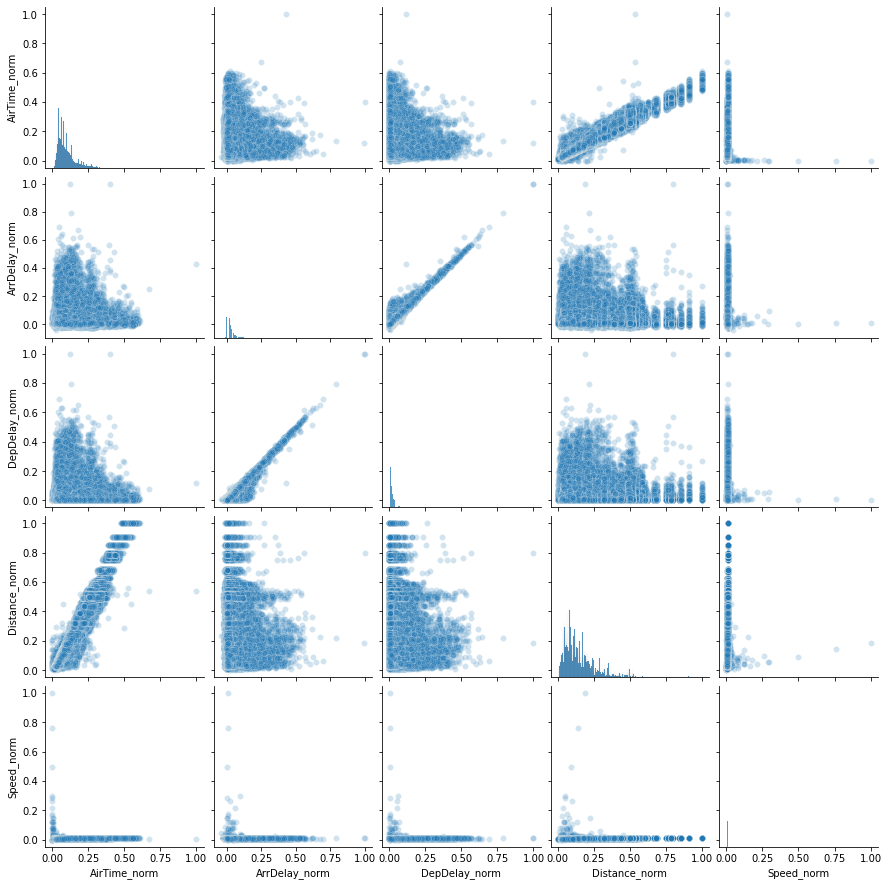

In [18]:
sns.pairplot(df_copy[new_columns_norm], diag_kind='hist', plot_kws={'alpha': 0.2})

In [19]:
#Para las columnas dummies creadas se creará un gráfico de barras. 

new_columns_dummy= new_columns[:20] #Escogemos las columnas dummies de las lista de nuevas col. creadas.

sum_dummy=[] #lista vacia

for i in new_columns_dummy:
    sum_dummy.append(df_copy[i].sum()) #Calculamos los totales de cada columna dummy, es decir, de cada aerolínea.

dic_dummy={'carrier':new_columns_dummy,'sum_total':sum_dummy} # Creamos un diccionario donde recopilamos la información

df_dummy=pd.DataFrame(dic_dummy) #Convertimos el diccionario a Dataframe.


<AxesSubplot:xlabel='carrier'>

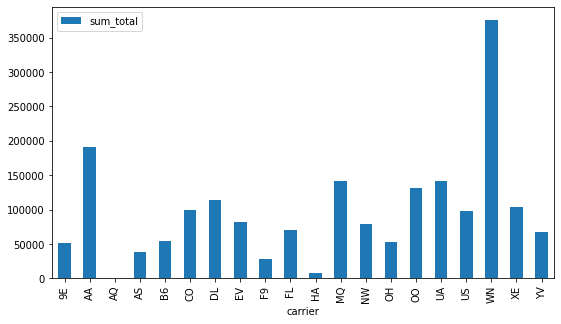

In [20]:
df_dummy.plot(x='carrier',y='sum_total',kind='bar',figsize=(9,5))